 ###### Pool_card   -> # de Cartas que o usuário ja selecionou
 ###### Pack_card   -> # de Cartas que saíram no pacote em questão
 ###### Pack_Number -> # Rodada do pack atual
 ###### Pick_Number -> # Rodada do pick atual

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [2]:
#Read all_decks file and get integer columns
df_deck = pd.read_csv("Data/all_decks.csv",nrows=1)
#(columns int64 -> int8)
columns = []
for column in df_deck.columns.unique():
    if 'pool_' in column:
        columns.append(column)
    if 'pack_card_' in column:
        columns.append(column)

# Make the dtype dict (int64 -> int8)
conversion_integers_columns = {item: np.int8 for item in columns}
conversion_integers_columns['user_game_win_rate_bucket'] = np.float32
conversion_integers_columns['pick'] = 'category'

In [3]:
df_deck = pd.read_csv("Data/all_decks.csv",dtype=conversion_integers_columns)
#best_users_df = pd.read_csv("Data/draft_data_best_players_sc.csv",dtype=conversion_integers_columns)

# Data Exploration

In [8]:
df_deck.head(2)

,expansion,event_type,draft_id,draft_time,rank,event_match_wins,event_match_losses,pack_number,pick_number,pick,...,pool_Wurmcoil Engine,pool_Yotian Dissident,pool_Yotian Frontliner,pool_Yotian Medic,pool_Yotian Tactician,pool_Zephyr Sentinel,pack_card_Mishra's Bauble,pool_Mishra's Bauble,user_n_games_bucket,user_game_win_rate_bucket
0,BRO,PremierDraft,bcfb83124fd448a18e384b965bd7c133,2022-11-15 21:26:14,diamond,4,3,2,14,Energy Refractor,...,0,0,0,0,0,0,0,0,50,0.60
1,BRO,PremierDraft,8fe2f3ea79a442138b08d131c3645fc3,2022-11-15 23:03:10,platinum,1,3,2,14,Mine Worker,...,0,0,0,0,0,1,0,0,100,0.56


<AxesSubplot:xlabel='rank', ylabel='user_game_win_rate_bucket'>

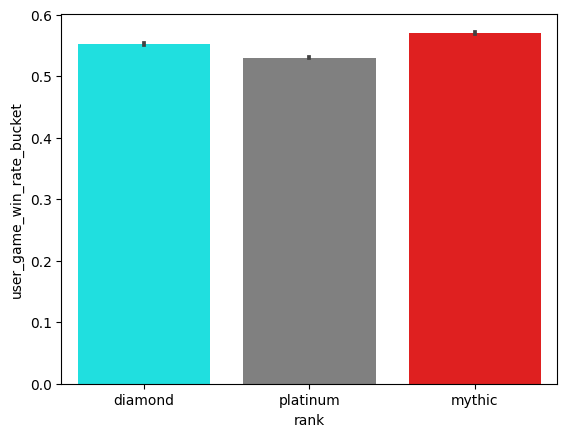

In [5]:
sns.barplot(df_deck,x=df_deck['rank'], y=df_deck['user_game_win_rate_bucket'],estimator='mean', palette=['cyan', 'gray', 'red'])

<AxesSubplot:xlabel='rank', ylabel='user_n_games_bucket'>

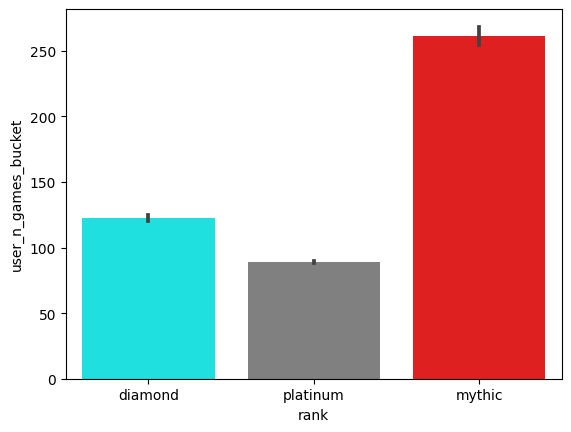

In [6]:
sns.barplot(df_deck,x=df_deck['rank'], y=df_deck['user_n_games_bucket'], palette=['cyan', 'gray', 'red'])

### First step -> Make the sinergy between the cards
    Sinergy = Quantity of if one card appears on one deck -> this other card will appears too.

In [10]:
df_deck['rank'].value_counts()
df_filtered = df_deck[df_deck['rank'] == 'mythic'].head(50)

In [18]:
card_list = []
for column in df_filtered.columns.unique():
    if 'pool_' in column:
        card = column.replace('pool_','')
        card_list.append(card)

In [22]:
n_cards = len(card_list)
pairs = [[0 for i in range(n_cards)] for j in range(n_cards)]  # Cards that were drafted together
freq = [0]*n_cards
guilds = [[0 for i in range(5)] for j in range(5)]

NameError: name 'nCards' is not defined